In [75]:
from __future__ import absolute_import
import autograd.numpy as np
from autograd import elementwise_grad
%matplotlib inline
import seaborn as sns
rcParams['figure.figsize'] = (12,8)

# toy example 1

In [14]:
# Here we use elementwise_grad to support broadcasting, which makes evaluating
# the gradient functions faster and avoids the need for calling 'map'.

def tanh(x):
    return (1.0 - np.exp(-x))  / (1.0 + np.exp(-x))

In [15]:
d_fun      = elementwise_grad(tanh)       # First derivative
dd_fun     = elementwise_grad(d_fun)      # Second derivative
ddd_fun    = elementwise_grad(dd_fun)     # Third derivative
dddd_fun   = elementwise_grad(ddd_fun)    # Fourth derivative
ddddd_fun  = elementwise_grad(dddd_fun)   # Fifth derivative
dddddd_fun = elementwise_grad(ddddd_fun)  # Sixth derivative

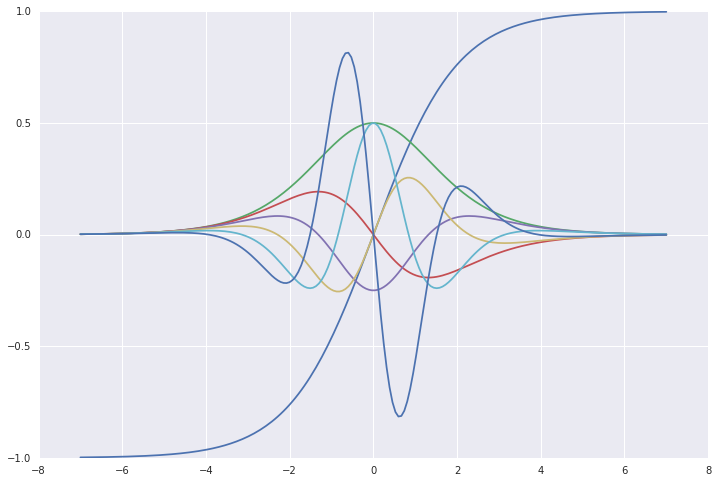

In [76]:
x = np.linspace(-7, 7, 200)
plt.plot(x, tanh(x),
         x, d_fun(x),
         x, dd_fun(x),
         x, ddd_fun(x),
         x, dddd_fun(x),
         x, ddddd_fun(x),
         x, dddddd_fun(x))

# toy example 2

In [22]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad

def taylor_sine(x):  # Taylor approximation to sine function
    ans = currterm = x
    i = 0
    while np.abs(currterm) > 0.001:
        currterm = -currterm * x**2 / ((2 * i + 3) * (2 * i + 2))
        ans = ans + currterm
        i += 1
    return ans

grad_sine = grad(taylor_sine)
print "Gradient of sin(pi) is", grad_sine(np.pi/2)

Gradient of sin(pi) is 2.47372763646e-05


In [79]:
x = np.arange(-10,10,0.01)

In [80]:
y = np.array([taylor_sine(_x) for _x in x])
z = np.array([grad_sine(_x) for _x in x])

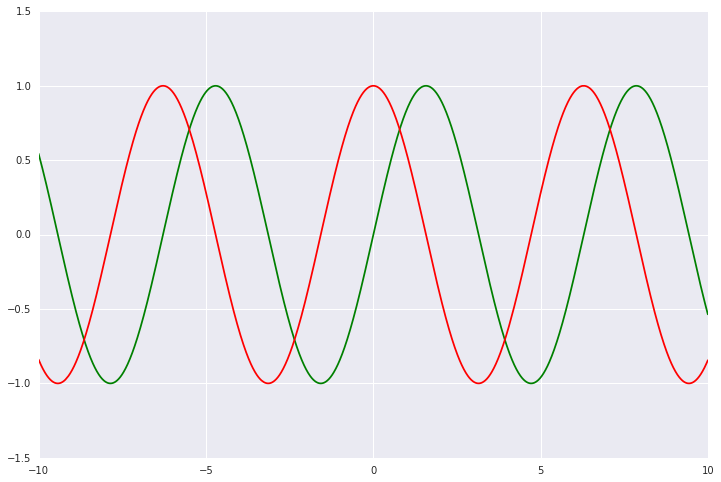

In [81]:
plot(x,y,'g')
plot(x,z,'r')
plt.grid('on')

# logistic regression

In [59]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5*(np.tanh(x) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
learning_rate = 0.1
training_loss_history = []
print "Initial loss:", training_loss(weights)
for i in xrange(2000):
    weights -= training_gradient_fun(weights) * learning_rate
    training_loss_history.append(training_loss(weights))

print  "Trained loss:", training_loss(weights)

Initial loss: 2.77258872224
Trained loss: 0.00212025817313


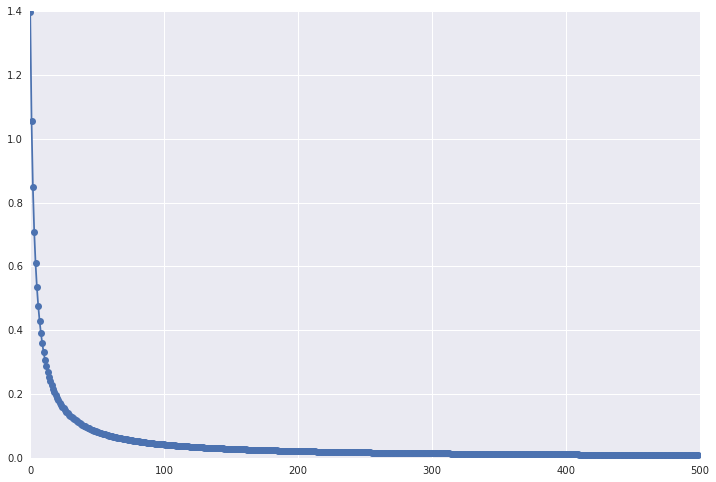

In [83]:
plt.plot(training_loss_history[:500],'-o')